In [1]:
import numpy as np
from PIL import Image

SEED = 42
np.random.seed(SEED)

In [2]:
from sklearn.cluster import KMeans

def load_data_from_figure(path):
    img = Image.open(path).convert('L')
    img = 1 - np.array(img).astype(np.float32) / 255.0
    points = np.argwhere(img)

    clustering = KMeans(n_clusters=250, random_state=SEED).fit(points)
    centers = []

    for k in set(clustering.labels_):
        cluster = points[clustering.labels_ == k]
        centroid = cluster.mean(axis=0)
        centers.append(centroid)

    centers = np.array(centers)
    return centers, img

def fix_x(X, img):
    X = X[:, [1, 0]]
    X[:, 1] = img.shape[0] - X[:, 1]
    return X

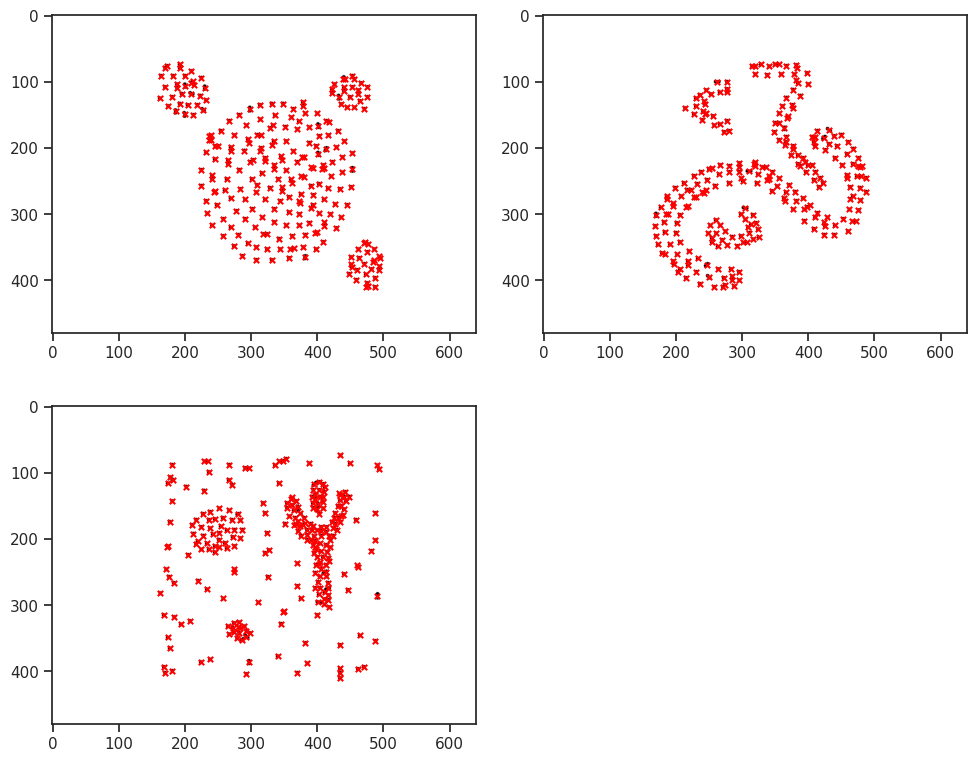

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

fig, axarr = plt.subplots(2, 2, figsize=(10, 8))
fig.tight_layout()
Xs = []

for i, ax in enumerate(axarr.ravel()):
    try:
        X, img = load_data_from_figure(f'data/figure{i+1}.png')
        ax.imshow(1 - img, cmap='gray')
        ax.scatter(X[:, 1], X[:, 0], s=15, marker='x', color='red')
        Xs.append(fix_x(X, img))
    except FileNotFoundError:
        ax.axis('off')

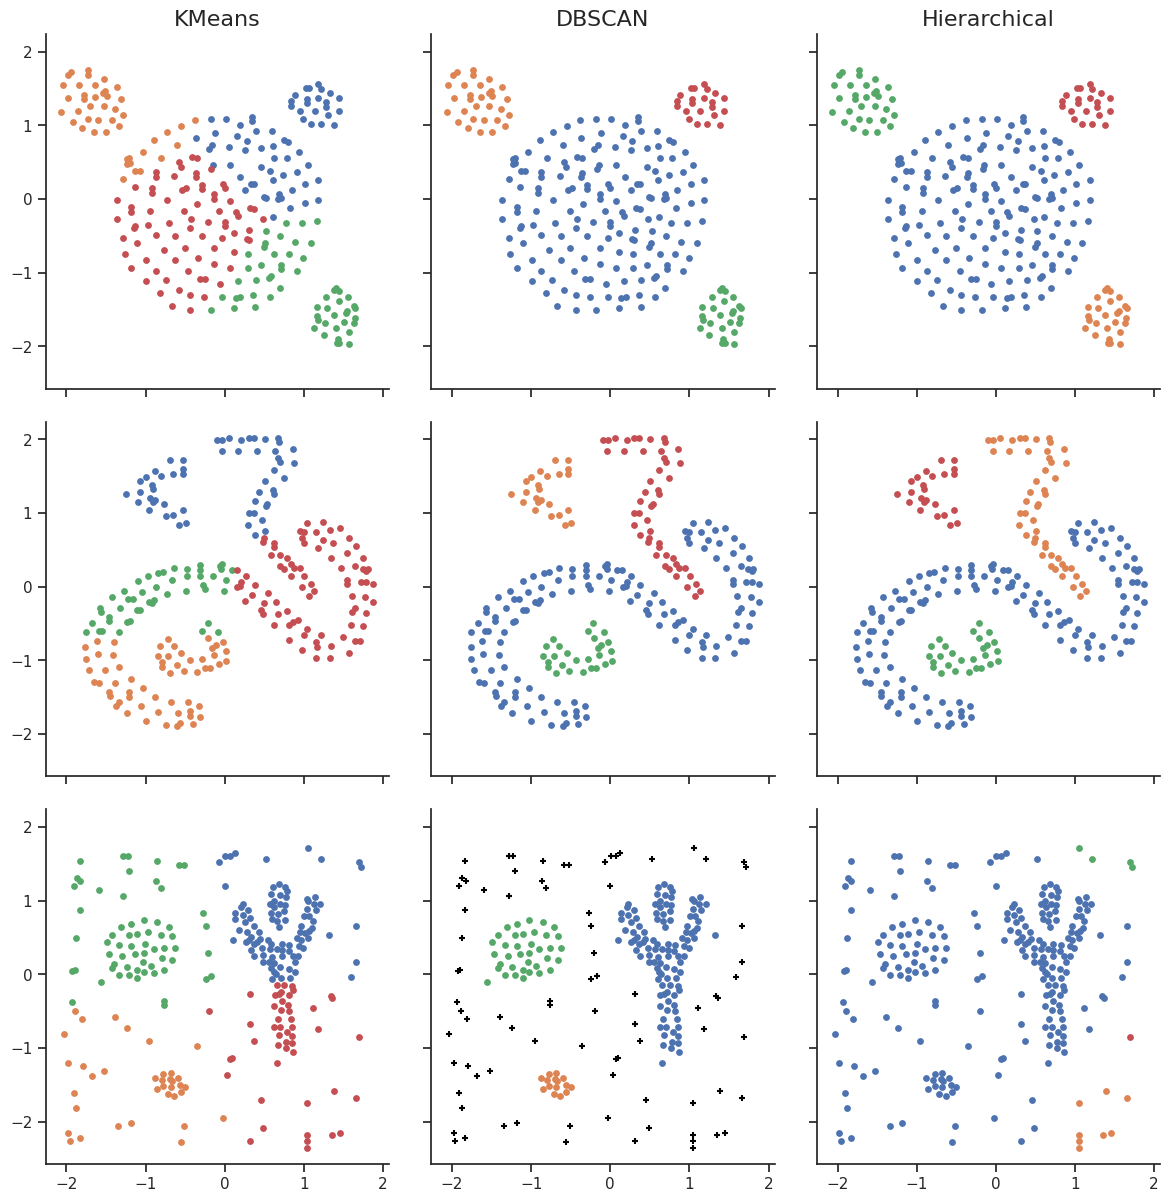

In [4]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

fig, axarr = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 12))
fig.tight_layout()

clustering = [{
    'KMeans': KMeans(n_clusters=4, random_state=SEED), 
    'DBSCAN': DBSCAN(eps=eps), 
    'Hierarchical': AgglomerativeClustering(4, linkage='single')
} for eps in [0.3, 0.25, 0.25]]

Xs_scaled = [StandardScaler().fit_transform(X) for X in Xs]

for i, (ax_cols, X) in enumerate(zip(axarr, Xs_scaled)):
    for ax, clusterer in zip(ax_cols, clustering[i].values()):
        sns.despine(ax=ax)
        
        labels = clusterer.fit_predict(X)
        for label in set(labels):
            cluster = X[labels == label]
            ax.scatter(cluster[:, 0], cluster[:, 1], s=15, 
                       color='black' if label == -1 else None, 
                       marker='+' if label == -1 else None)
            
    if i == 0:
        for ax, name in zip(ax_cols, clustering[i]):
            ax.set_title(name, fontsize=16)